In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.tree import DecisionTreeRegressor
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000

In [3]:
#Population of real data pixels
directory = 'f3CandsImgsPKS_0324_2018-07-02T01:00/'

# directory = 'artificial_fil/beam_imgs'
imgDirs = [os.path.join(directory,img) for img in os.listdir(directory) if 'png' in img]
inds = np.random.choice(range(len(imgDirs)),1500,replace=False)
imgDirs = np.array(imgDirs)[inds]
cands_imgs = np.array([plt.imread(imgDir) for imgDir in imgDirs])
cands_pixels = (np.ndarray.flatten(cands_imgs))

np.random.shuffle(cands_pixels)

In [4]:
#Population of training data pixels
directory = 'highF_injSignalSMALL/'
imgDirs = [os.path.join(directory,img) for img in os.listdir(directory) if 'png' in img]
inds = np.random.choice(range(len(imgDirs)),750,replace=False)
imgDirs = np.array(imgDirs)[inds]
imgs = np.array([plt.imread(imgDir) for imgDir in imgDirs])
trainS_pixels = np.ndarray.flatten(imgs)

directory = 'highF_noSignalSMALL/'
imgDirs = [os.path.join(directory,img) for img in os.listdir(directory) if 'png' in img]
inds = np.random.choice(range(len(imgDirs)),750,replace=False)
imgDirs = np.array(imgDirs)[inds]
imgs = np.array([plt.imread(imgDir) for imgDir in imgDirs])
trainB_pixels = np.ndarray.flatten(imgs)

train_pixels = np.concatenate((trainS_pixels,trainB_pixels))
np.random.shuffle(train_pixels)

In [5]:
#Random sample of real and training data pixels, sorted and normalized from zero to one
cands_inds = np.random.choice(range(len(cands_pixels)),1000000,replace=False)
train_inds = np.random.choice(range(len(train_pixels)),1000000,replace=False)
cands_pixels = cands_pixels[cands_inds]
train_pixels = train_pixels[train_inds]
train_pixels = np.sort(train_pixels)
cands_pixels = np.sort(cands_pixels)
train_pixels/=max(train_pixels)
cands_pixels/=max(cands_pixels)

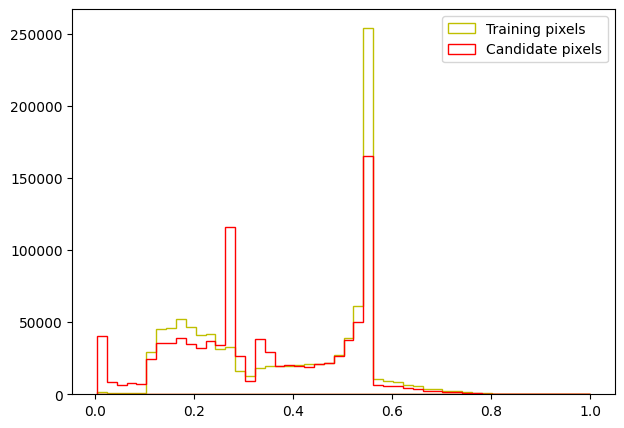

In [6]:
#Histogram plotting real and training data pixel distributions
plt.figure(figsize=(7,5))
log = False
plt.hist(train_pixels,bins=50,histtype="stepfilled",fill=None,log=log,ec='y',label='Training pixels')
plt.hist(cands_pixels,bins=50,histtype="stepfilled",fill=None,log=log,ec='r',label='Candidate pixels')
plt.legend()
# plt.xlim(0,1)
plt.show()

Text(0, 0.5, 'Train pixels')

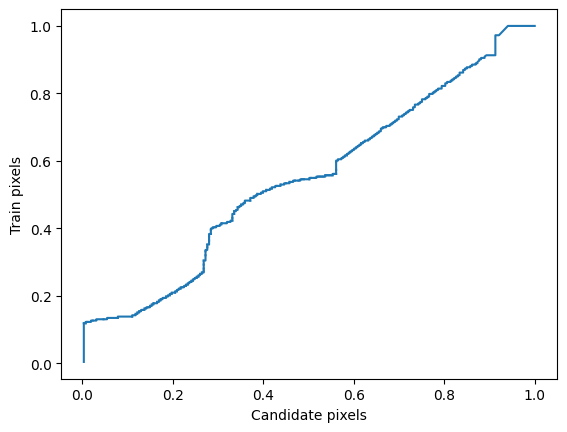

In [7]:
#Plot real pixels against training pixels
plt.plot(cands_pixels,train_pixels)
plt.xlabel('Candidate pixels')
plt.ylabel('Train pixels')
# plt.xlim(0,1)

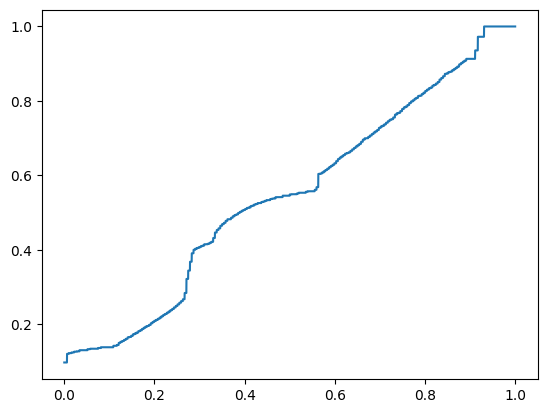

In [8]:
#Fit DecisionTree to match scaling of real pixels to training data pixels
tree = DecisionTreeRegressor()
tree.fit(cands_pixels.reshape(-1,1),train_pixels.reshape(-1,1))
x = np.linspace(0,1,10000)
y = tree.predict(x.reshape(-1,1))
plt.plot(x,y)

Text(0.5, 0, 'Pixel intensities')

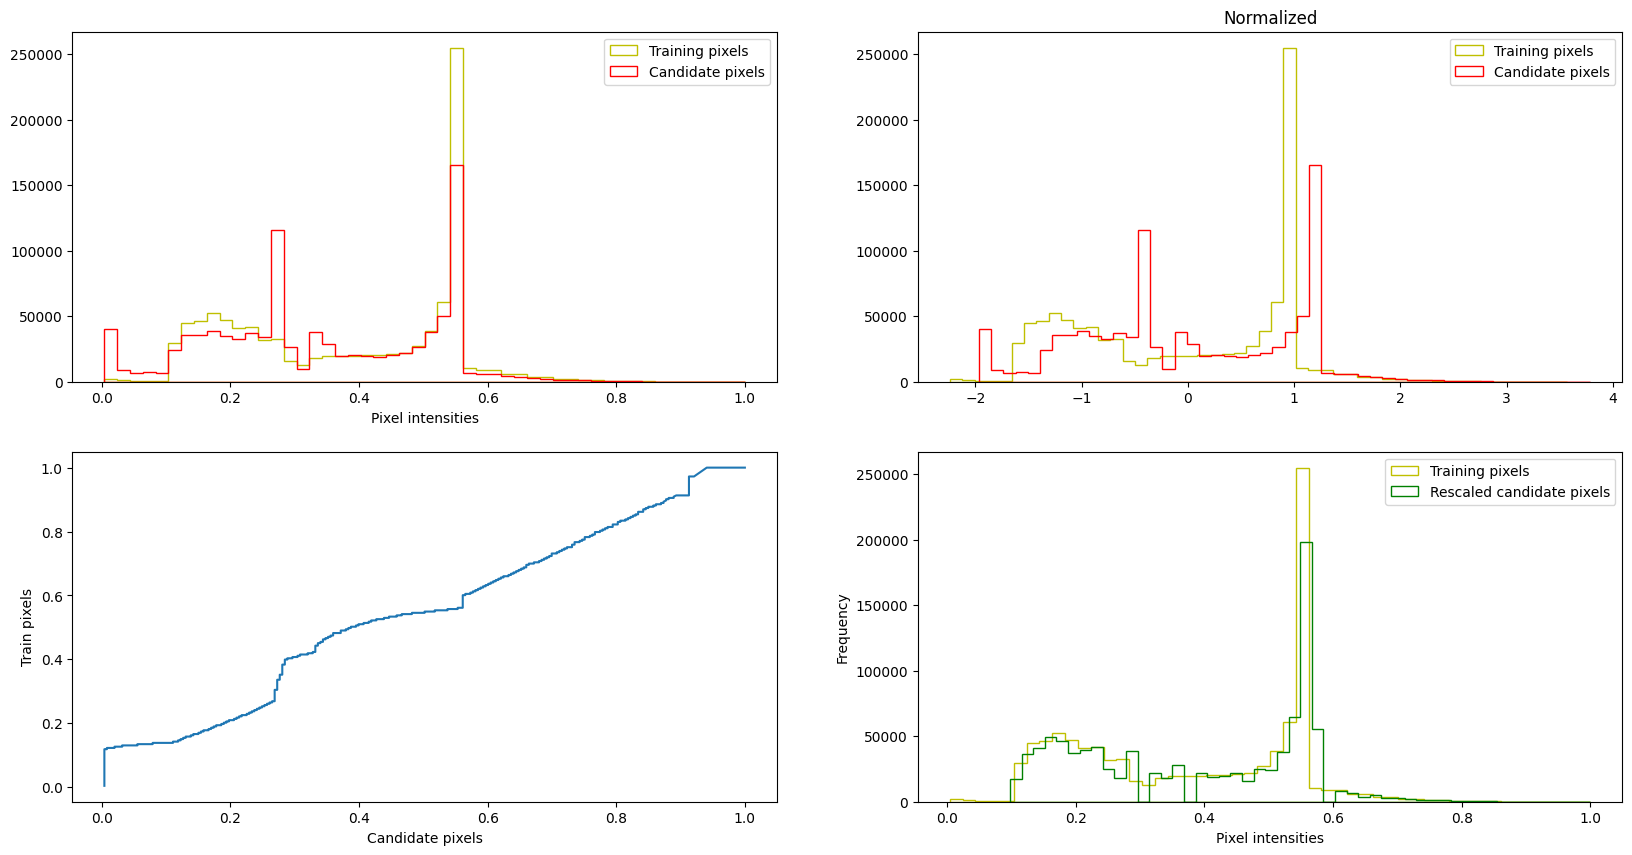

In [9]:
plt.style.use('default')
plt.figure(figsize=(20,10))

#Before scaling
plt.subplot(2,2,1)
log = False
plt.hist(train_pixels,bins=50,histtype="stepfilled",fill=None,log=log,ec='y',label='Training pixels')
plt.hist(cands_pixels,bins=50,histtype="stepfilled",fill=None,log=log,ec='r',label='Candidate pixels')
plt.legend()
# plt.ylabel('Frequency')
plt.xlabel('Pixel intensities')

#Previous preprocessing (normalization by subtracting mean and dividing by std dev)
plt.subplot(2,2,2)
norm_train = (train_pixels-np.mean(train_pixels))/np.std(train_pixels)
norm_cands = (cands_pixels-np.mean(cands_pixels))/np.std(cands_pixels)
log = False
plt.hist(norm_train,bins=50,histtype="stepfilled",fill=None,log=log,ec='y',label='Training pixels')
plt.hist(norm_cands,bins=50,histtype="stepfilled",fill=None,log=log,ec='r',label='Candidate pixels')
plt.legend()
# plt.ylabel('Frequency')
plt.title('Normalized')

#Scaling function from real data pixel distribution to training data pixel distribution
plt.subplot(2,2,3)
plt.plot(cands_pixels,train_pixels)
plt.xlabel('Candidate pixels')
plt.ylabel('Train pixels')

#Scaled pixel distributions after appling scaling function to real data pixels
plt.subplot(2,2,4)
log = False
plt.hist(train_pixels,bins=50,histtype="stepfilled",fill=None,log=log,ec='y',label='Training pixels')
plt.hist(tree.predict(cands_pixels.reshape(-1,1)),bins=50,histtype="stepfilled",fill=None,log=log,ec='g',label='Rescaled candidate pixels')
plt.legend()
plt.ylabel('Frequency')
plt.xlabel('Pixel intensities')



In [10]:
def scale(img_array):
    return tree.predict(np.ndarray.flatten(img_array).reshape(-1,1)).reshape(img_array.shape)

In [11]:
i=0

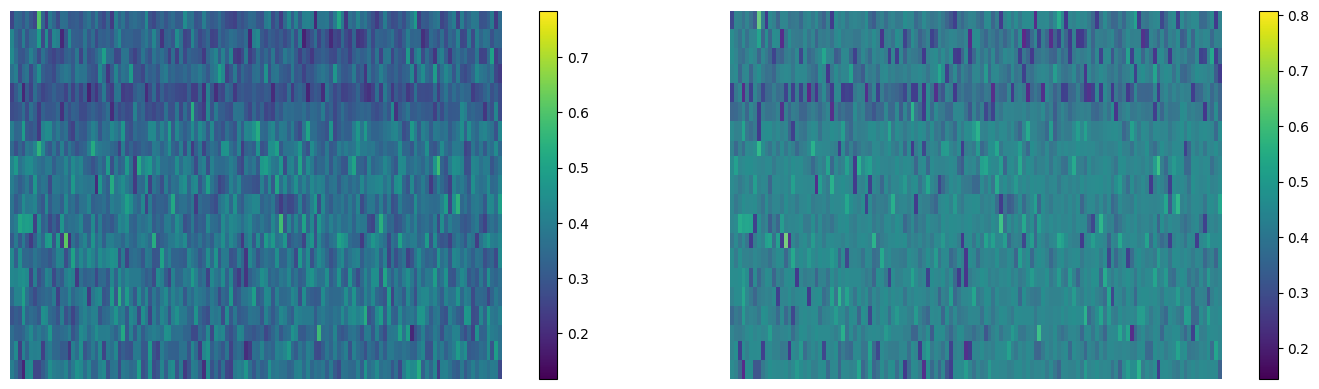

In [77]:
#Run multiple times to view image before and after scaling 
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(cands_imgs[i])
plt.colorbar()
plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(scale(cands_imgs[i]))
plt.colorbar()
plt.tight_layout()
plt.show()

i+=1

In [36]:
tree_pickle = open('read2trainDist.pkl', 'wb')

pickle.dump(tree,tree_pickle)
tree_pickle.close()